In [209]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime
import geopandas as gpd



In [210]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 5)
saved_style_state = matplotlib.rcParams.copy()  # give us a style state to go back to

In [211]:
print(os.listdir('.'))
file_path = '/Users/jiangyuhao/CODE1161/data/billionaires_2024.csv'
data = pd.read_csv(file_path)

['Untitled Folder', 'data_introduction', 'Untitled1.ipynb', 'My data.ipynb', 'Untitled.ipynb', 'billionaire_map.html', 'README.md', 'billionaires_2024.csv', '.gitignore', 'ne_10m_admin_0_countries', '.ipynb_checkpoints', '.git', '.vscode']


In [212]:
print(data.dtypes)  

year                          int64
month                         int64
rank                          int64
net_worth                    object
last_name                    object
first_name                   object
full_name                    object
birth_date                   object
age                         float64
gender                       object
country_of_citizenship       object
country_of_residence         object
city_of_residence            object
business_category            object
business_industries          object
organization_name            object
position_in_organization     object
self_made                      bool
wealth_status                object
dtype: object


In [213]:
# 检查缺失值
data.isnull().sum()

year                           0
month                          0
rank                           0
net_worth                      0
last_name                      0
first_name                     4
full_name                      0
birth_date                    82
age                           72
gender                         0
country_of_citizenship         0
country_of_residence          34
city_of_residence             63
business_category              0
business_industries            0
organization_name           2449
position_in_organization    2426
self_made                      0
wealth_status                271
dtype: int64

In [214]:
# 填补 age 列的缺失值为平均值
data['age'].fillna(data['age'].mean(), inplace=True)

# 检查结果
print(data['age'].isnull().sum())

0


/var/folders/21/sg4743yj6zdbq6vz160z4xlc0000gn/T/ipykernel_2035/1560859338.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [215]:
# 删除 organization_name 和 position_in_organization 列
data = data.drop(columns=['organization_name', 'position_in_organization'])

# 再次检查数据的信息
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2781 entries, 0 to 2780
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    2781 non-null   int64  
 1   month                   2781 non-null   int64  
 2   rank                    2781 non-null   int64  
 3   net_worth               2781 non-null   object 
 4   last_name               2781 non-null   object 
 5   first_name              2777 non-null   object 
 6   full_name               2781 non-null   object 
 7   birth_date              2699 non-null   object 
 8   age                     2781 non-null   float64
 9   gender                  2781 non-null   object 
 10  country_of_citizenship  2781 non-null   object 
 11  country_of_residence    2747 non-null   object 
 12  city_of_residence       2718 non-null   object 
 13  business_category       2781 non-null   object 
 14  business_industries     2781 non-null   

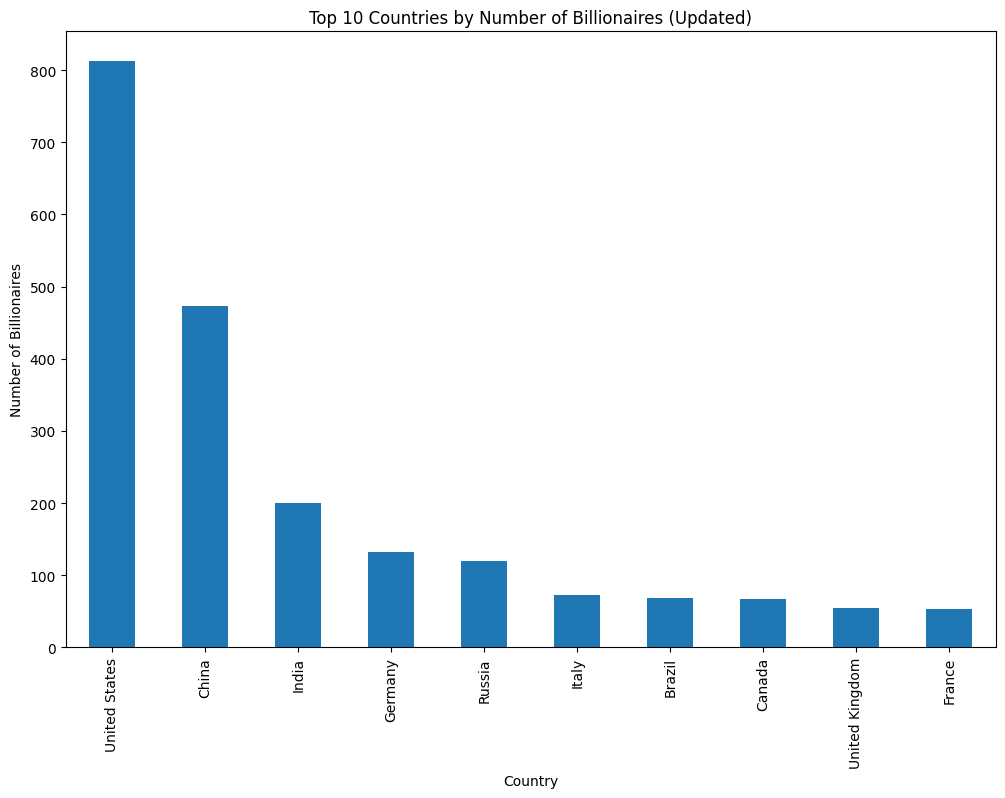

In [216]:
# 将 "Hong Kong" 替换为 "China"
data['country_of_citizenship'] = data['country_of_citizenship'].replace(['Hong Kong', 'Hong Kong, China'], 'China')

# 再次统计每个国家的亿万富翁数量
country_count_updated = data['country_of_citizenship'].value_counts()

# 可视化更新后的国家的亿万富翁分布（前10个国家）
plt.figure(figsize=(12, 8))
country_count_updated.head(10).plot(kind='bar')
plt.title('Top 10 Countries by Number of Billionaires (Updated)')
plt.xlabel('Country')
plt.ylabel('Number of Billionaires')
plt.show()

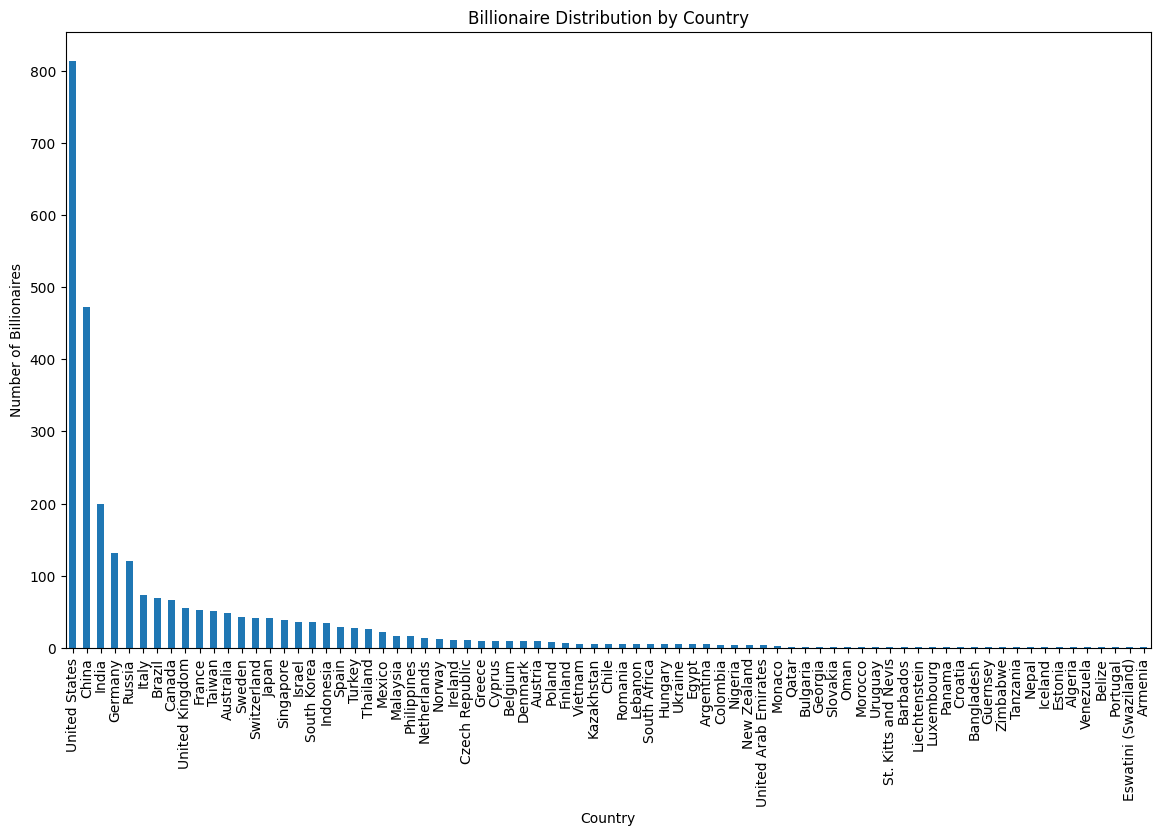

In [217]:
# 统计每个国家的亿万富翁数量
country_count = data['country_of_citizenship'].value_counts()



# 可视化国家的亿万富翁分布（所有国家）
plt.figure(figsize=(14, 8))
country_count.plot(kind='bar')
plt.title('Billionaire Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Number of Billionaires')
plt.show()

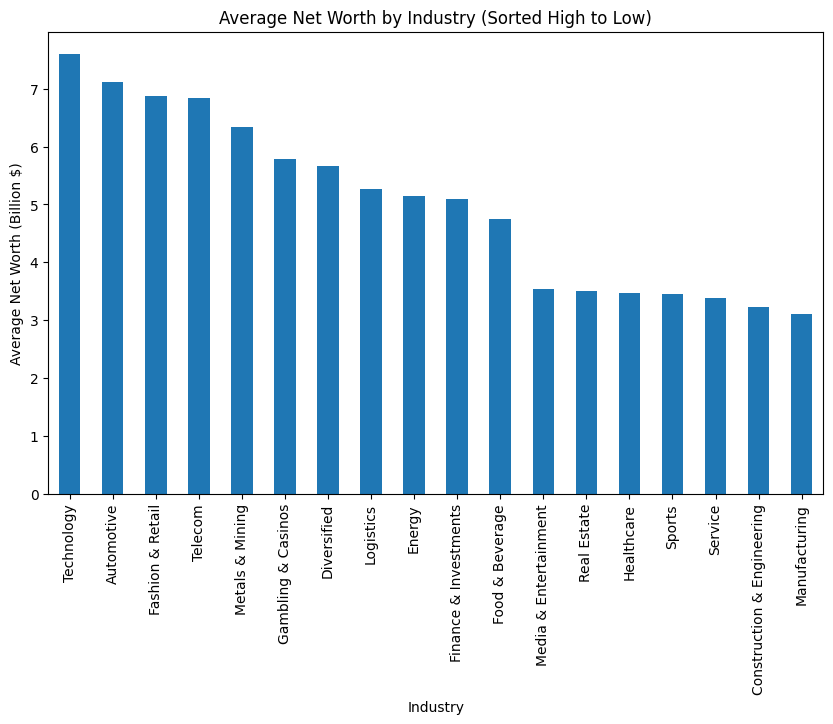

In [218]:
# 更严格的清洗 net_worth 列，去掉 " B" 并将其转换为数值类型，处理其他可能的非数值字符
data['net_worth'] = data['net_worth'].replace({' B': '', ',': ''}, regex=True)

# 试图将所有的net_worth转换为浮点数，如果不能转换就变为NaN
data['net_worth'] = pd.to_numeric(data['net_worth'], errors='coerce')

# 删除任何净资产为NaN的行，确保数据的完整性
data = data.dropna(subset=['net_worth'])

# 分析财富最集中和最分散的行业
industry_net_worth = data.groupby('business_category')['net_worth'].sum()
industry_count = data['business_category'].value_counts()

# 计算每个行业的平均财富
industry_avg_net_worth = industry_net_worth / industry_count

# 对平均净资产进行从高到低的排序
industry_avg_net_worth_sorted = industry_avg_net_worth.sort_values(ascending=False)

# 可视化排序后的行业平均财富分布
plt.figure(figsize=(10, 6))
industry_avg_net_worth_sorted.plot(kind='bar')
plt.title('Average Net Worth by Industry (Sorted High to Low)')
plt.xlabel('Industry')
plt.ylabel('Average Net Worth (Billion $)')
plt.xticks(rotation=90)
plt.show()

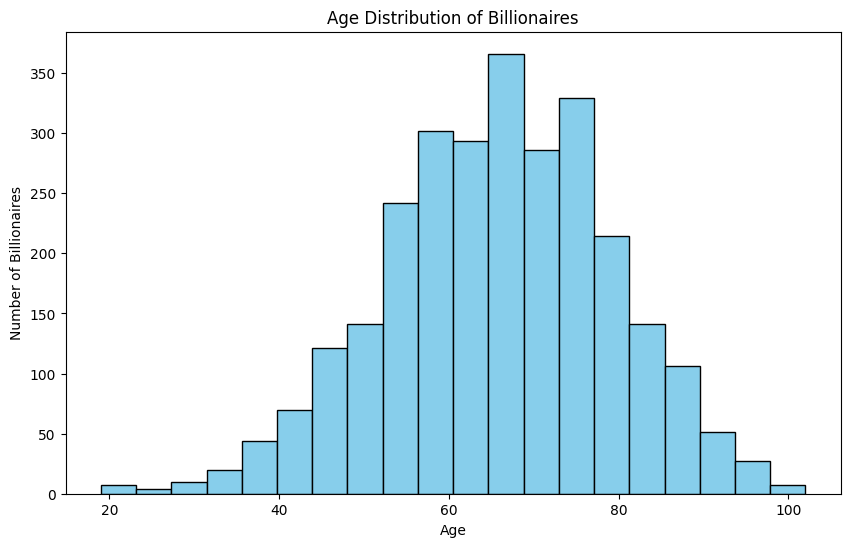

Youngest Billionaire:
Name: Clemente Del Vecchio
Age: 19.0
Net Worth: 4.7 Billion USD
Country: Italy
Industry: Fashion & Retail

Oldest Billionaire:
Name: George Joseph
Age: 102.0
Net Worth: 1.7 Billion USD
Country: United States
Industry: Finance & Investments


In [219]:
# 数据清洗
# 处理 age 列中可能存在的缺失值或异常值
data['age'] = pd.to_numeric(data['age'], errors='coerce')
data = data.dropna(subset=['age'])

# 1. 分析不同年龄段亿万富翁的财富分布
plt.figure(figsize=(10, 6))
plt.hist(data['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Billionaires')
plt.xlabel('Age')
plt.ylabel('Number of Billionaires')
plt.show()

# 2. 识别最年轻和最年长的亿万富翁
youngest_billionaire = data.loc[data['age'].idxmin()]
oldest_billionaire = data.loc[data['age'].idxmax()]

# 打印最年轻亿万富翁的信息
print("Youngest Billionaire:")
print(f"Name: {youngest_billionaire['full_name']}")
print(f"Age: {youngest_billionaire['age']}")
print(f"Net Worth: {youngest_billionaire['net_worth']} Billion USD")
print(f"Country: {youngest_billionaire['country_of_citizenship']}")
print(f"Industry: {youngest_billionaire['business_category']}")

# 打印最年长亿万富翁的信息
print("\nOldest Billionaire:")
print(f"Name: {oldest_billionaire['full_name']}")
print(f"Age: {oldest_billionaire['age']}")
print(f"Net Worth: {oldest_billionaire['net_worth']} Billion USD")
print(f"Country: {oldest_billionaire['country_of_citizenship']}")
print(f"Industry: {oldest_billionaire['business_category']}")

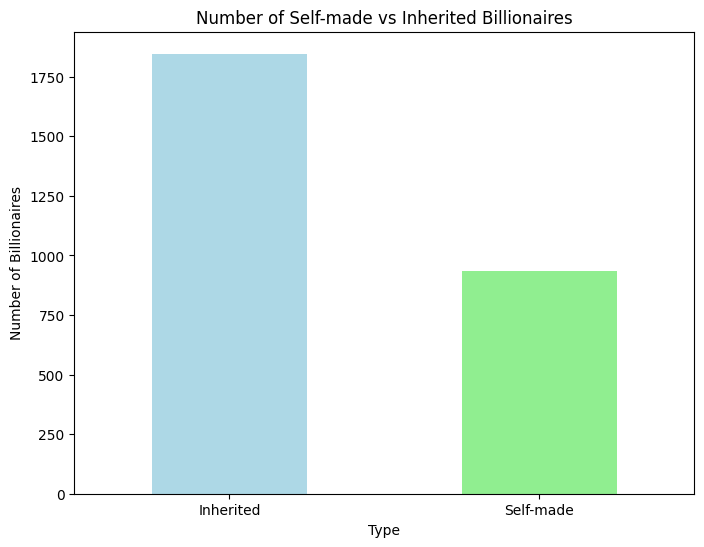

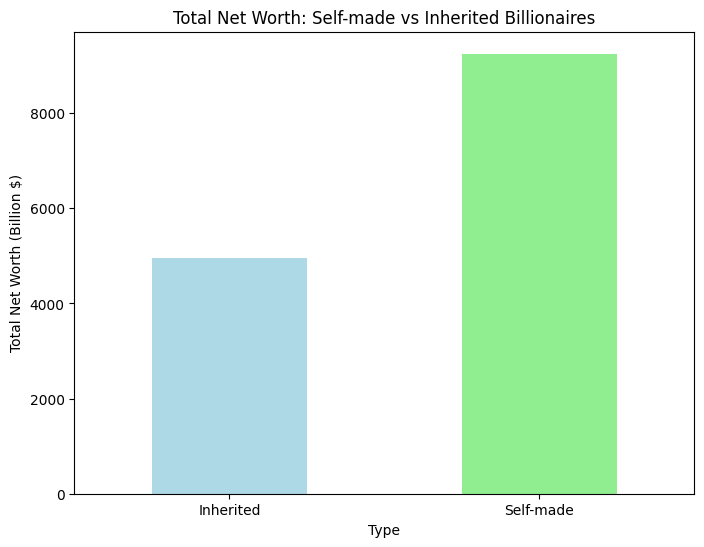

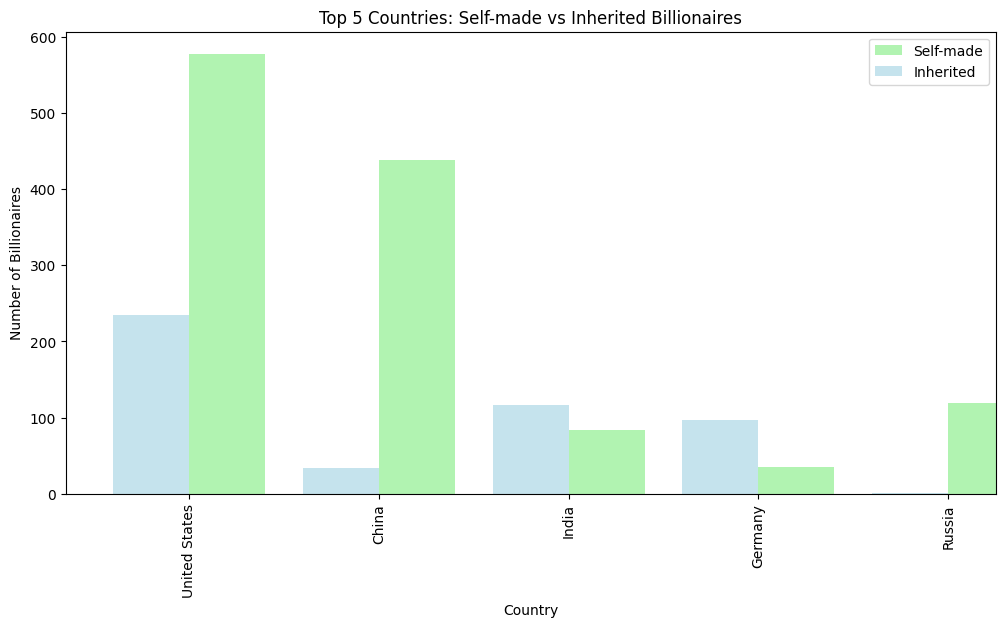

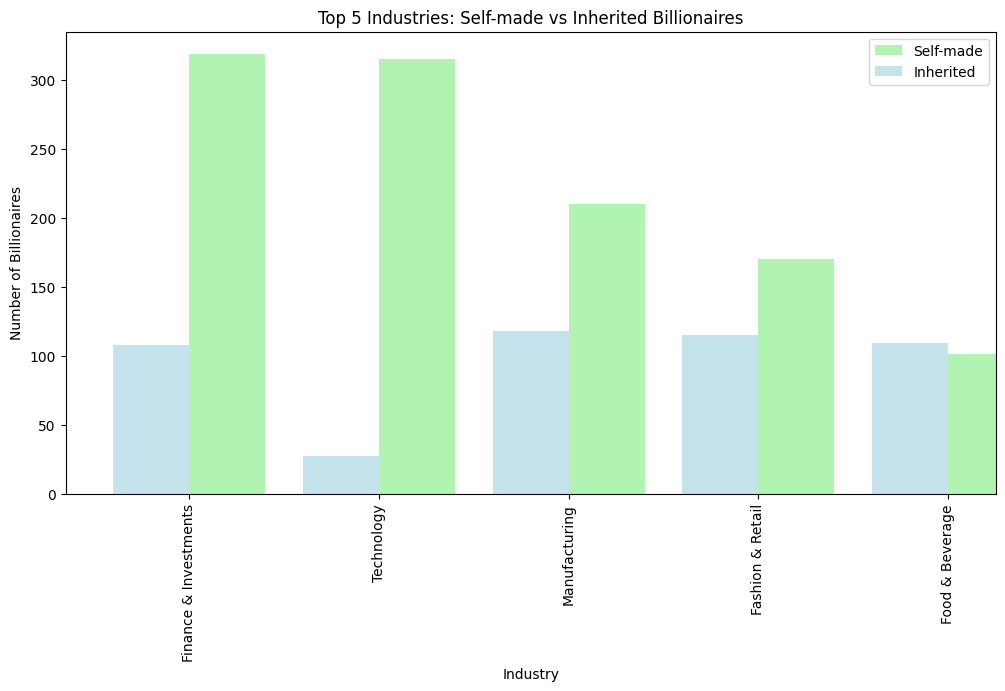

In [220]:
# 数据清洗
# 将 self_made 列中值转换为布尔值
data['self_made'] = data['self_made'].astype(bool)

# 1. 比较“自制”亿万富翁与“继承”亿万富翁的数量和净资产
self_made_count = data['self_made'].value_counts()
self_made_net_worth = data.groupby('self_made')['net_worth'].sum()

# 可视化数量对比
plt.figure(figsize=(8, 6))
self_made_count.plot(kind='bar', color=['lightblue', 'lightgreen'])
plt.title('Number of Self-made vs Inherited Billionaires')
plt.xlabel('Type')
plt.ylabel('Number of Billionaires')
plt.xticks(ticks=[0, 1], labels=['Inherited', 'Self-made'], rotation=0)
plt.show()

# 可视化净资产对比
plt.figure(figsize=(8, 6))
self_made_net_worth.plot(kind='bar', color=['lightblue', 'lightgreen'])
plt.title('Total Net Worth: Self-made vs Inherited Billionaires')
plt.xlabel('Type')
plt.ylabel('Total Net Worth (Billion $)')
plt.xticks(ticks=[0, 1], labels=['Inherited', 'Self-made'], rotation=0)
plt.show()

# 2. 分析这些亿万富翁主要集中在哪些国家和行业

# 找出亿万富翁数量最多的前5个国家
top_5_countries = data['country_of_citizenship'].value_counts().head(5).index

# 过滤出这些国家的自制和继承亿万富翁
self_made_countries = data[data['self_made'] == True]['country_of_citizenship'].value_counts().reindex(top_5_countries, fill_value=0)
inherited_countries = data[data['self_made'] == False]['country_of_citizenship'].value_counts().reindex(top_5_countries, fill_value=0)

# 可视化前5个国家的数量
plt.figure(figsize=(12, 6))
self_made_countries.plot(kind='bar', color='lightgreen', alpha=0.7, position=0, width=0.4, label='Self-made')
inherited_countries.plot(kind='bar', color='lightblue', alpha=0.7, position=1, width=0.4, label='Inherited')
plt.title('Top 5 Countries: Self-made vs Inherited Billionaires')
plt.xlabel('Country')
plt.ylabel('Number of Billionaires')
plt.legend()
plt.show()

# 找出亿万富翁数量最多的前5个行业
top_5_industries = data['business_category'].value_counts().head(5).index

# 过滤出这些行业的自制和继承亿万富翁
self_made_industries = data[data['self_made'] == True]['business_category'].value_counts().reindex(top_5_industries, fill_value=0)
inherited_industries = data[data['self_made'] == False]['business_category'].value_counts().reindex(top_5_industries, fill_value=0)

# 可视化前5个行业的数量
plt.figure(figsize=(12, 6))
self_made_industries.plot(kind='bar', color='lightgreen', alpha=0.7, position=0, width=0.4, label='Self-made')
inherited_industries.plot(kind='bar', color='lightblue', alpha=0.7, position=1, width=0.4, label='Inherited')
plt.title('Top 5 Industries: Self-made vs Inherited Billionaires')
plt.xlabel('Industry')
plt.ylabel('Number of Billionaires')
plt.legend()
plt.show()

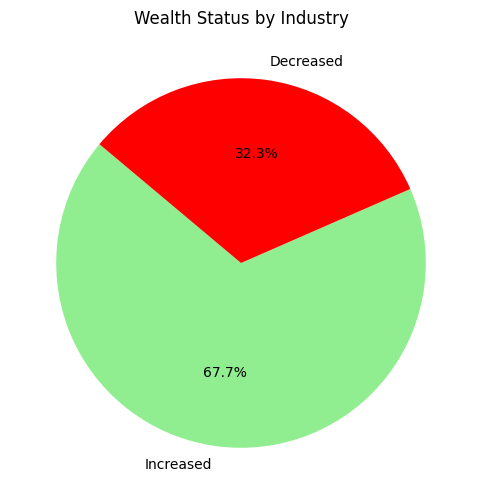

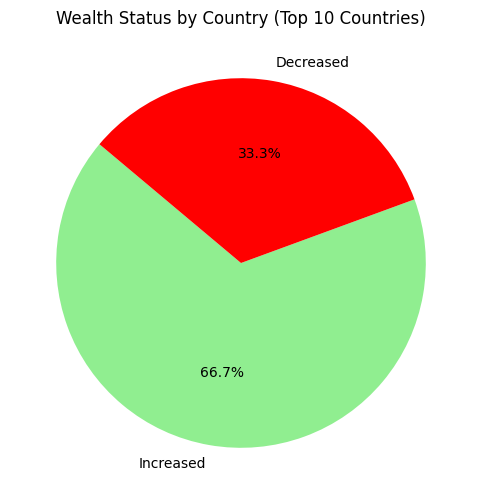

In [221]:

# 清洗财富状态，排除空值
data = data.dropna(subset=['wealth_status'])

# 1. 使用饼图展示财富状态在行业和国家中的分布

# 计算行业中财富增加和减少的数量
industry_increased = data[data['wealth_status'] == 'Increased']['business_category'].value_counts()
industry_decreased = data[data['wealth_status'] == 'Decreased']['business_category'].value_counts()

# 合并增加和减少的数据
industry_status = pd.DataFrame({'Increased': industry_increased, 'Decreased': industry_decreased}).fillna(0)

# 计算财富增加和减少的总和
industry_total = industry_status.sum()

# 绘制饼图（行业）
plt.figure(figsize=(10, 6))
industry_total.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'red'], labels=['Increased', 'Decreased'])
plt.title('Wealth Status by Industry')
plt.show()

# 计算国家中财富增加和减少的数量
country_increased = data[data['wealth_status'] == 'Increased']['country_of_citizenship'].value_counts()
country_decreased = data[data['wealth_status'] == 'Decreased']['country_of_citizenship'].value_counts()

# 合并增加和减少的数据
country_status = pd.DataFrame({'Increased': country_increased, 'Decreased': country_decreased}).fillna(0)

# 选择亿万富翁最多的前10个国家
top_10_countries = country_status.sum(axis=1).sort_values(ascending=False).head(10).index
country_status_top_10 = country_status.loc[top_10_countries]

# 计算财富增加和减少的总和（国家）
country_total = country_status_top_10.sum()

# 绘制饼图（国家）
plt.figure(figsize=(10, 6))
country_total.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'red'], labels=['Increased', 'Decreased'])
plt.title('Wealth Status by Country (Top 10 Countries)')
plt.show()

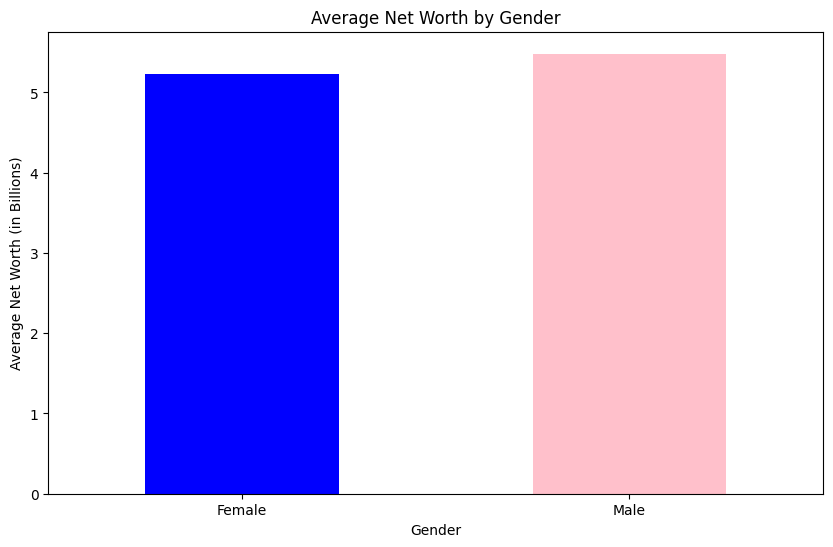

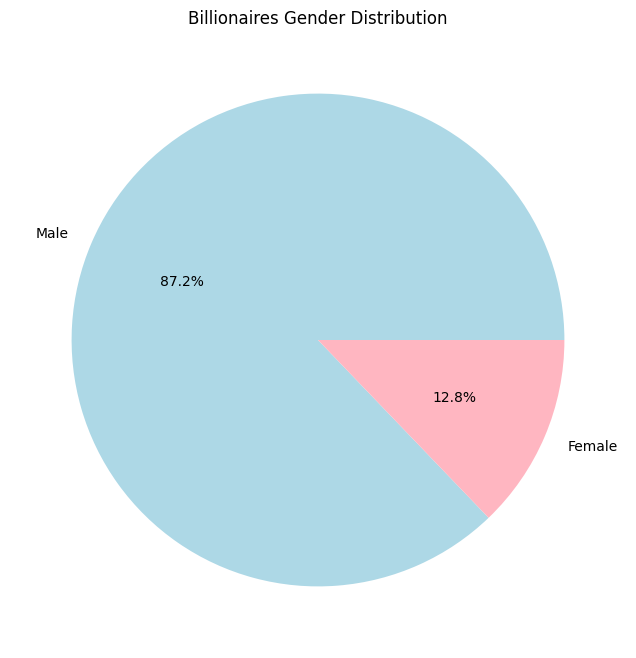

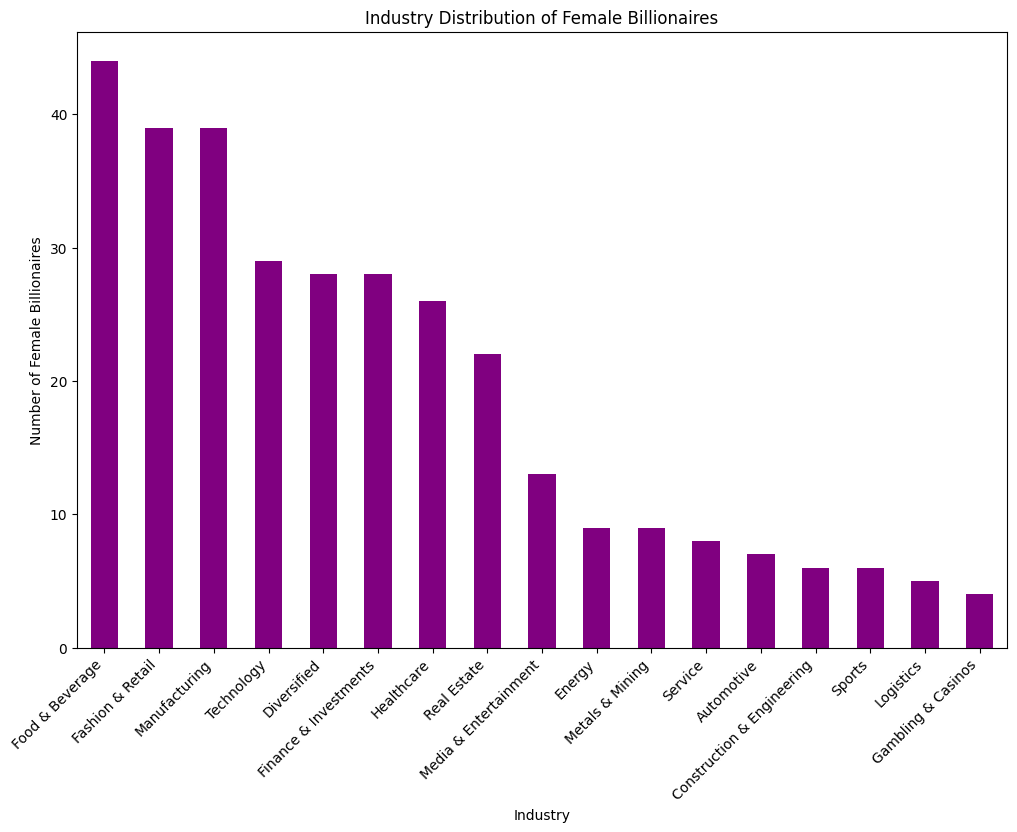

In [222]:

# 3. 分析性别与财富之间的关系
# 计算男性和女性亿万富翁的平均净资产
avg_net_worth_by_gender = data.groupby('gender')['net_worth'].mean()

# 计算男性和女性亿万富翁的人数比例
gender_counts = data['gender'].value_counts()

# 4. 探讨女性亿万富翁的行业分布和财富集中情况
# 统计女性亿万富翁在各个行业中的人数
female_data = data[data['gender'] == 'Female']
female_industry_distribution = female_data['business_category'].value_counts()

# 计算女性亿万富翁在各个行业中的总财富
female_industry_wealth = female_data.groupby('business_category')['net_worth'].sum()

# 5. 可视化结果

# 性别与平均净资产关系的条形图
plt.figure(figsize=(10, 6))
avg_net_worth_by_gender.plot(kind='bar', color=['blue', 'pink'])
plt.title('Average Net Worth by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Net Worth (in Billions)')
plt.xticks(rotation=0)
plt.show()

# 性别分布的饼图
plt.figure(figsize=(8, 8))
gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightpink'])
plt.title('Billionaires Gender Distribution')
plt.ylabel('')
plt.show()

# 女性亿万富翁行业分布的条形图
plt.figure(figsize=(12, 8))
female_industry_distribution.plot(kind='bar', color='purple')
plt.title('Industry Distribution of Female Billionaires')
plt.xlabel('Industry')
plt.ylabel('Number of Female Billionaires')
plt.xticks(rotation=45, ha='right')
plt.show()



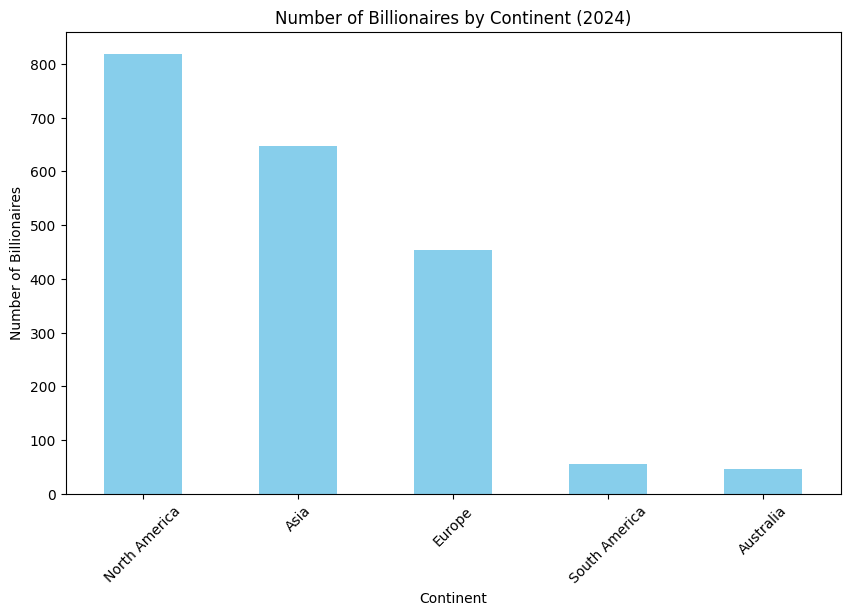

<Figure size 1400x800 with 0 Axes>

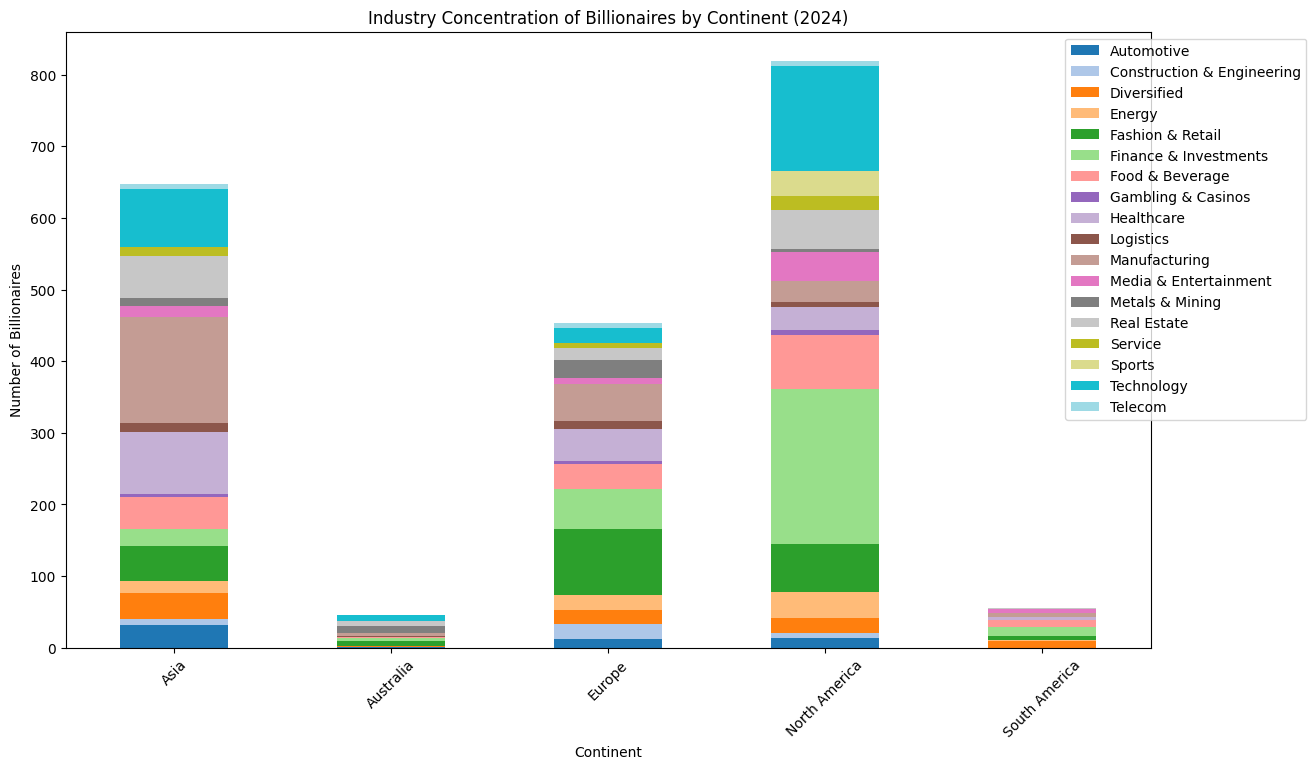

In [223]:
import matplotlib.pyplot as plt

# Define a mapping of countries to continents
continent_mapping = {
    'United States': 'North America',
    'France': 'Europe',
    'China': 'Asia',
    'India': 'Asia',
    'Germany': 'Europe',
    'Russia': 'Europe',
    'United Kingdom': 'Europe',
    'Brazil': 'South America',
    'Canada': 'North America',
    'Australia': 'Australia',
    'Mexico': 'North America',
    'Japan': 'Asia',
    'Italy': 'Europe',
    'Spain': 'Europe',
    'Switzerland': 'Europe',
    # Add other countries and regions as needed
}

# Apply the mapping to create a new column `continent`
data['continent'] = data['country_of_citizenship'].map(continent_mapping)

# Group by continent to count the number of billionaires
continent_distribution = data['continent'].value_counts()

# Analyze the concentration of industries within continents
industry_concentration = data.groupby(['continent', 'business_category']).size().unstack().fillna(0)

# Visualization of the number of billionaires by continent
plt.figure(figsize=(10, 6))
continent_distribution.plot(kind='bar', color='skyblue')
plt.title('Number of Billionaires by Continent (2024)')
plt.xlabel('Continent')
plt.ylabel('Number of Billionaires')
plt.xticks(rotation=45)
plt.show()

# Visualization of industry concentration within continents
plt.figure(figsize=(14, 8))
industry_concentration.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')
plt.title('Industry Concentration of Billionaires by Continent (2024)')
plt.xlabel('Continent')
plt.ylabel('Number of Billionaires')
plt.xticks(rotation=45)
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

In [227]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# 加载世界地图 shapefile 文件
world = gpd.read_file('/Users/jiangyuhao/CODE1161/data/ne_10m_admin_0_countries')

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)


/var/folders/21/sg4743yj6zdbq6vz160z4xlc0000gn/T/ipykernel_2035/3780346961.py:61: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




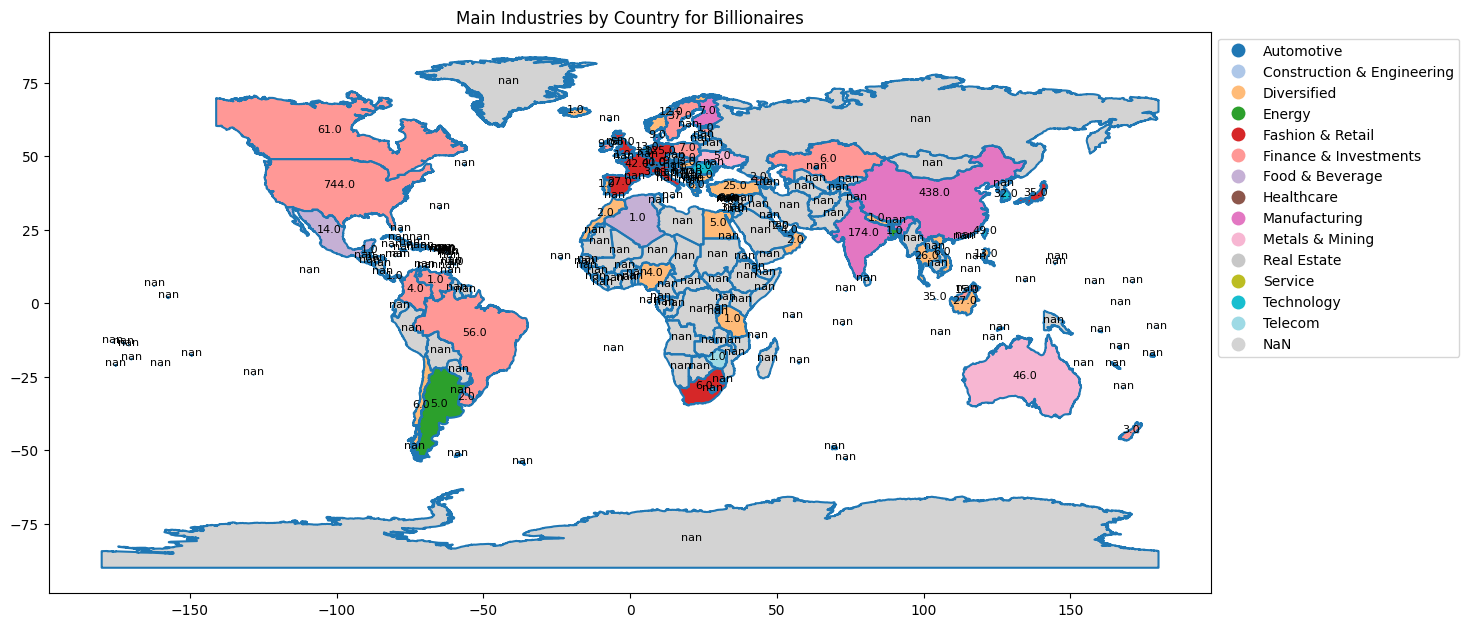

In [230]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, MultiPolygon


# 检查列名
print(world.columns)



# 标准化国家名称
data['country_of_citizenship'] = data['country_of_citizenship'].replace({
    'United States': 'United States of America',
    'Russia': 'Russian Federation',
    # 添加更多需要匹配的国家名称
})

# 处理 MultiPolygon，确保我们可以正确迭代其中的部分
def extract_largest_polygon(geometry):
    if isinstance(geometry, MultiPolygon):
        largest_polygon = max(geometry.geoms, key=lambda a: a.area)
        return largest_polygon
    return geometry

# 对每个几何体应用处理函数
world['geometry'] = world['geometry'].apply(extract_largest_polygon)

# 统计每个国家在各个行业中的亿万富翁数量
country_industry_distribution = data.groupby(['country_of_citizenship', 'business_category']).size().unstack(fill_value=0)

# 将亿万富翁数量最多的行业标记为该国的主要行业
country_industry_max = country_industry_distribution.idxmax(axis=1)
country_industry_max.name = 'business_category'

# 计算每个国家的亿万富翁总数
country_industry_max_counts = country_industry_distribution.sum(axis=1)
country_industry_max_counts.name = 'billionaire_count'

# 确保合并前没有重复的列
if 'business_category' in world.columns:
    world = world.drop(columns=['business_category'])
if 'billionaire_count' in world.columns:
    world = world.drop(columns=['billionaire_count'])

# 使用正确的列名进行合并
world = world.merge(country_industry_max, how="left", left_on="NAME", right_index=True)
world = world.merge(country_industry_max_counts, how="left", left_on="NAME", right_index=True)

# 绘制地图
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# 绘制世界地图，国家边界
world.boundary.plot(ax=ax)

# 用颜色表示不同国家的主要行业
world.plot(column='business_category', ax=ax, legend=True, 
           legend_kwds={'bbox_to_anchor': (1, 1)}, cmap='tab20', missing_kwds={'color': 'lightgrey'})

# 添加亿万富翁数量信息
for x, y, label in zip(world.geometry.centroid.x, world.geometry.centroid.y, world['billionaire_count']):
    ax.text(x, y, label, fontsize=8, ha='center', color='black')

plt.title('Main Industries by Country for Billionaires')
plt.show()